# The Sparks Foundation - Data Science & Business Analytics Internship

## TASK 4 - Exploratory Data Analysis - Sports
* Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
* As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.

### Charvi Jain

***Importing all necessary libraries.***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

***Reading and displaying the data from the Indian Premier League dataset.***

In [2]:
match = pd.read_csv("matches.csv")
match.tail(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [3]:
match.id.is_unique

True

In [4]:
delivery = pd.read_csv("deliveries.csv")
delivery.tail(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [5]:
match.shape

(756, 18)

In [6]:
delivery.shape

(179078, 21)

In [7]:
match[match.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [8]:
match.city = match.city.fillna('Dubai')

In [9]:
match[match.player_of_match.isnull()][['player_of_match','result']]

,player_of_match,result
300,NaN,no result
545,NaN,no result
570,NaN,no result
744,NaN,no result


In [10]:
match[(match.umpire1.isnull()) | (match.umpire2.isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


In [11]:
match.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [12]:
season=match[['id','season','winner']]
merge=delivery.merge(season,how='inner',left_on='match_id',right_on='id')

In [13]:
merge.describe().T

,count,mean,std,min,25%,50%,75%,max
match_id,179078.0,1802.252957,3472.322805,1.0,190.0,379.0,567.0,11415.0
inning,179078.0,1.482952,0.502074,1.0,1.0,1.0,2.0,5.0
over,179078.0,10.162488,5.677684,1.0,5.0,10.0,15.0,20.0
ball,179078.0,3.615587,1.806966,1.0,2.0,4.0,5.0,9.0
is_super_over,179078.0,0.000452,0.021263,0.0,0.0,0.0,0.0,1.0
wide_runs,179078.0,0.036721,0.251161,0.0,0.0,0.0,0.0,5.0
bye_runs,179078.0,0.004936,0.116480,0.0,0.0,0.0,0.0,4.0
legbye_runs,179078.0,0.021136,0.194908,0.0,0.0,0.0,0.0,5.0
noball_runs,179078.0,0.004183,0.070492,0.0,0.0,0.0,0.0,5.0
penalty_runs,179078.0,0.000056,0.016709,0.0,0.0,0.0,0.0,5.0


In [14]:
match.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [15]:
match = match.drop(columns=["umpire3"],axis=1)
match.tail(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould


In [16]:
print("Basic Info Of Matches : \n")
print('Number Of Matches Played :',match.shape[0])
print("Number Of Seasons Played : ",match['season'].value_counts().nunique())
print("Top 10 Prominent Players of IPL : \n", match['player_of_match'].value_counts()[:10])
print("Most Winning Team and Number Of Matches: \n",match['winner'].value_counts())
print("Most Winning Team: \n",match['winner'].value_counts().idxmax())
print("Player Of The Match & Number Of Matches : \n",match['player_of_match'].value_counts())
print("Player Of The Match For Max . Matches : \n",match['player_of_match'].value_counts().idxmax())

Basic Info Of Matches : 

Number Of Matches Played : 756
Number Of Seasons Played :  7
Top 10 Prominent Players of IPL : 
 CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64
Most Winning Team and Number Of Matches: 
 Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64
Most Winning Team: 
 Mumbai Indians


In [17]:
print("Seasons Played at Different Venues :\n",match.groupby('city')['season'].nunique())
print("Winners at Different Venues :\n",match.groupby('city')['winner'].nunique())
print("Winners in Cities \n",match.groupby('city')['winner'].value_counts())

Seasons Played at Different Venues :
 city
Abu Dhabi          1
Ahmedabad          3
Bangalore          9
Bengaluru          2
Bloemfontein       1
Cape Town          1
Centurion          1
Chandigarh         9
Chennai            8
Cuttack            3
Delhi             11
Dharamsala         4
Dubai              1
Durban             1
East London        1
Hyderabad         10
Indore             3
Jaipur             7
Johannesburg       1
Kanpur             2
Kimberley          1
Kochi              1
Kolkata           11
Mohali             2
Mumbai            11
Nagpur             1
Port Elizabeth     1
Pune               6
Raipur             3
Rajkot             2
Ranchi             3
Sharjah            1
Visakhapatnam      4
Name: season, dtype: int64
Winners at Different Venues :
 city
Abu Dhabi          4
Ahmedabad          6
Bangalore         11
Bengaluru          6
Bloemfontein       2
Cape Town          6
Centurion          7
Chandigarh        10
Chennai            9
Cuttack     

In [18]:
city_venue = match.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

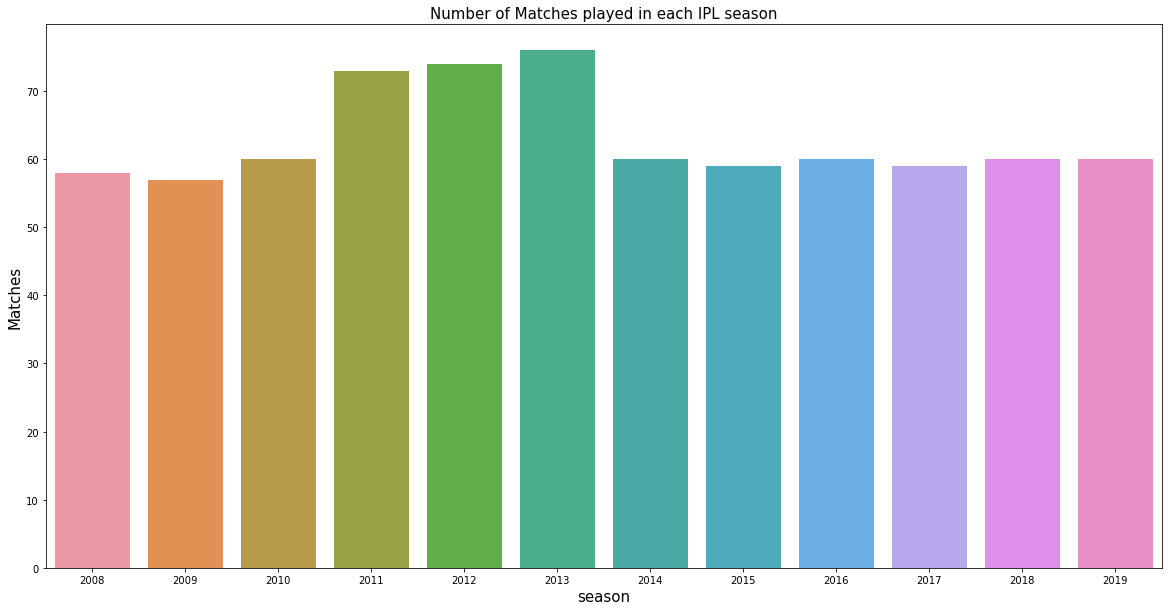

In [19]:
plt.figure(figsize = (20,10))
sns.countplot('season',data=match)
plt.title("Number of Matches played in each IPL season",fontsize=15)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

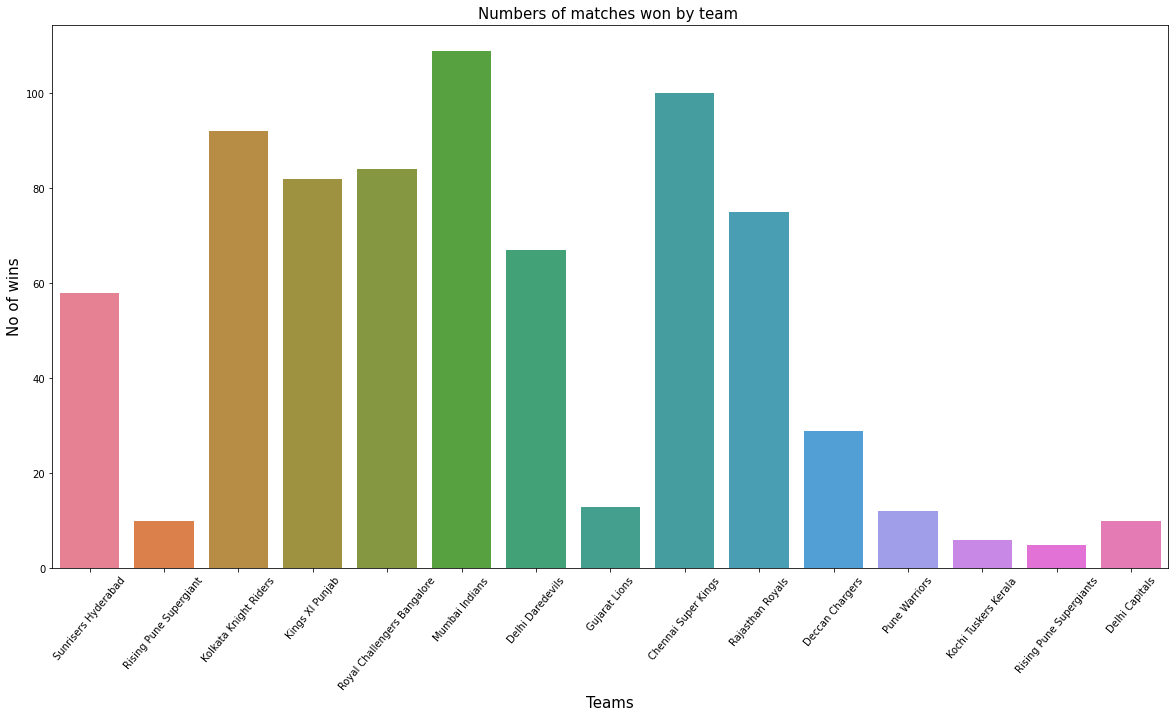

In [20]:
plt.figure(figsize = (20,10))
sns.countplot(x='winner',data=match, palette='husl')
plt.title("Numbers of matches won by team ",fontsize=15)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

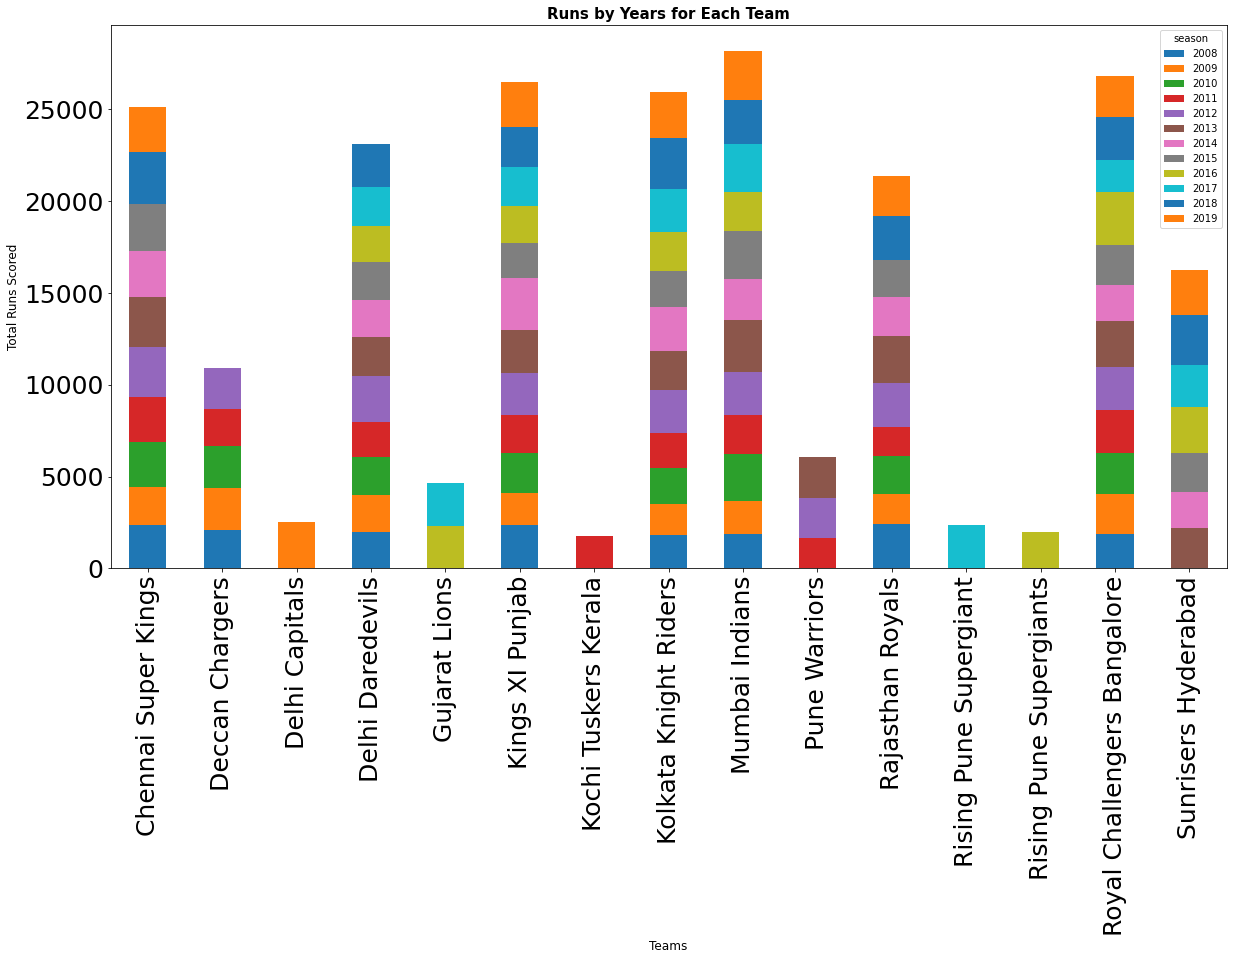

In [21]:
merge.groupby(['batting_team','season'])['batsman_runs'].sum().unstack().plot(kind = 'bar',stacked = True ,
                                                                                figsize = (20,10))
plt.title("Runs by Years for Each Team",fontsize= 15, fontweight = 'bold')
plt.xlabel("Teams", size = 12)
plt.ylabel("Total Runs Scored", size = 12)
plt.xticks(size = 25)
plt.yticks(size = 25)

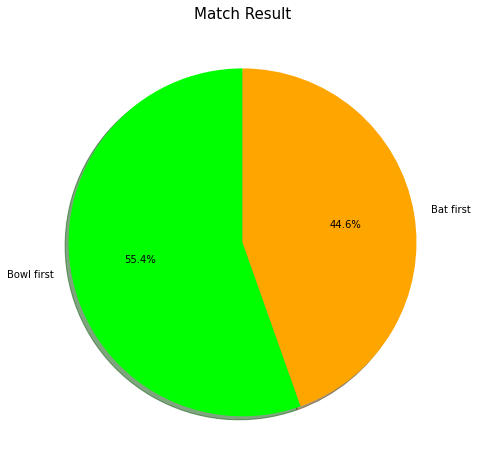

In [22]:
match['win_by']=np.where(match['win_by_runs']>0,'Bat first','Bowl first')
Win=match.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['lime','orange']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=15)
plt.show()

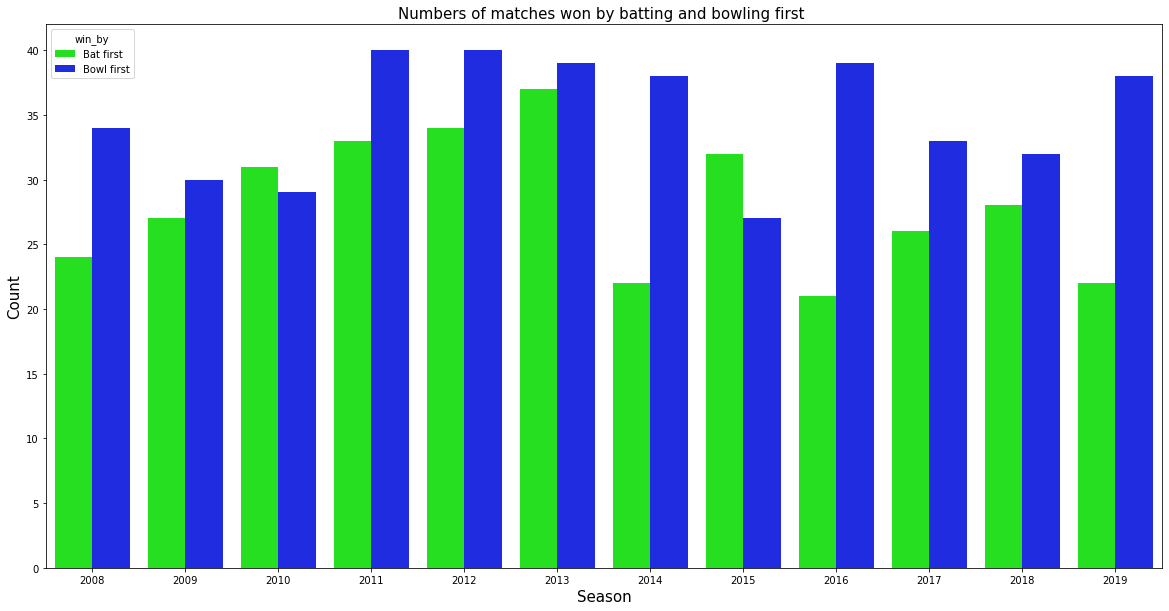

In [23]:
plt.figure(figsize = (20,10))
sns.countplot('season',hue='win_by',data=match,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

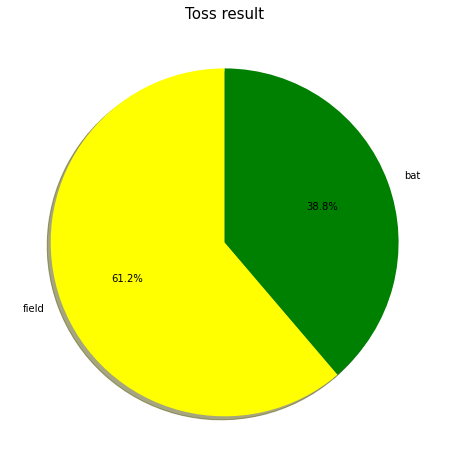

In [24]:
Toss=match.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['yellow', 'green']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=15)
plt.show()

In [25]:
match['toss_win_game_win'] = np.where((match.toss_winner == match.winner),'Yes','No')
match.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by,toss_win_game_win
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat first,No


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

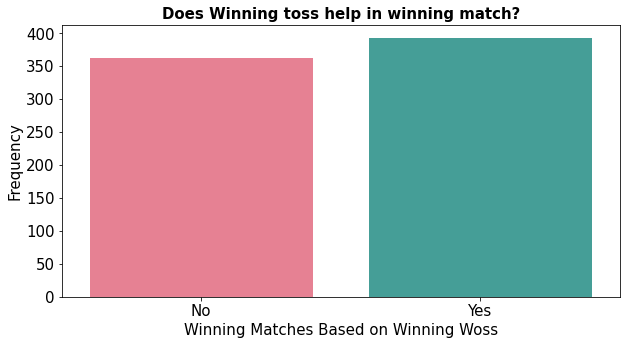

In [26]:
plt.figure(figsize=(10,5))
sns.countplot('toss_win_game_win', data=match, palette='husl')
plt.title("Does Winning toss help in winning match?",fontsize=15,fontweight="bold")
plt.ylabel("Frequency", size = 15)
plt.xlabel("Winning Matches Based on Winning Woss", size =15)
plt.xticks(size = 15)
plt.yticks(size = 15)

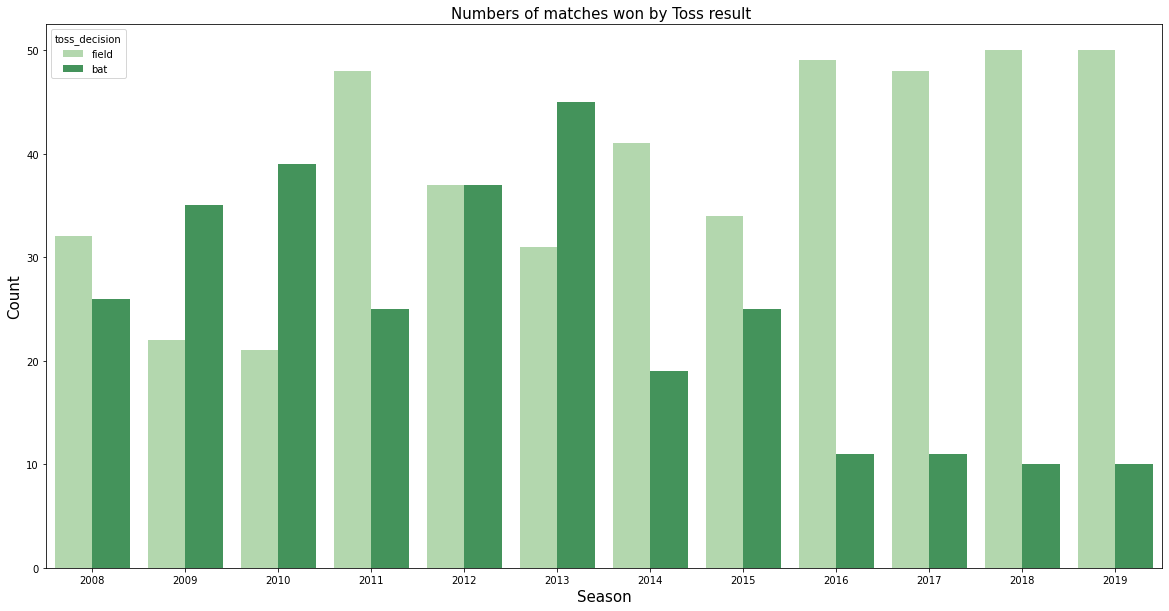

In [27]:
plt.figure(figsize = (20,10))
sns.countplot('season',hue='toss_decision',data=match,palette='Greens')
plt.title("Numbers of matches won by Toss result ",fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [28]:
match_final=match.drop_duplicates(subset=['season'], keep='last')
match_final[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


<Figure size 1440x720 with 0 Axes>

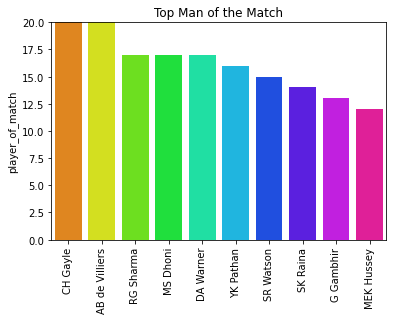

In [29]:
plt.figure(figsize = (20,10))
top_players = match.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_title("Top Man of the Match")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

In [30]:
match_final.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [31]:
match_final["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [32]:
match_final[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [33]:
match_final[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [34]:
fours=merge[merge['batsman_runs']==4]
fours.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


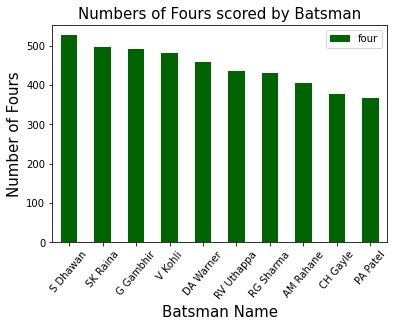

In [35]:
player_four=fours.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=player_four.iloc[:10,:].plot('batsman','four',kind='bar',color='darkgreen')
plt.title("Numbers of Fours scored by Batsman",fontsize=15)
plt.xticks(rotation=50)
plt.xlabel("Batsman Name",fontsize=15)
plt.ylabel("Number of Fours",fontsize=15)
plt.show()

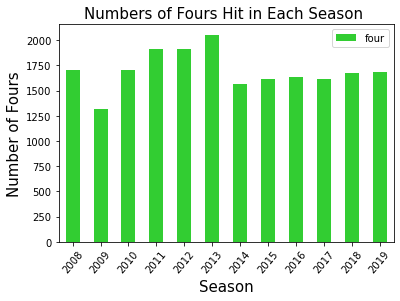

In [36]:
ax=fours.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'limegreen')
plt.title("Numbers of Fours Hit in Each Season ",fontsize=15)
plt.xticks(rotation=50)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Number of Fours",fontsize=15)
plt.show()

In [37]:
sixes=merge[merge['batsman_runs']==6]
sixes.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


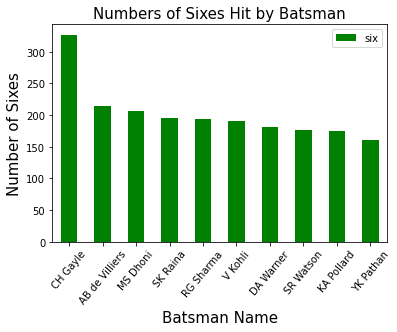

In [38]:
six_player=sixes.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=six_player.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title("Numbers of Sixes Hit by Batsman",fontsize=15)
plt.xticks(rotation=50)
plt.xlabel("Batsman Name",fontsize=15)
plt.ylabel("Number of Sixes",fontsize=15)
plt.show()

In [39]:
batsman_score=delivery.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',
                            ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 Run Scorer in IPL")
batsman_score.iloc[:10,:]

Top 10 Run Scorer in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [40]:
matches_played=delivery[["match_id","player_dismissed"]]
matches_played=matches_played.groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
matches_played.columns=["batsman","No_of Matches"]
matches_played.T

,0,1,2,3,4,5,6,7,8,9,...,477,478,479,480,481,482,483,484,485,486
batsman,SK Raina,RG Sharma,RV Uthappa,V Kohli,S Dhawan,G Gambhir,KD Karthik,PA Patel,AM Rahane,AT Rayudu,...,Mustafizur Rahman,N Naik,ND Doshi,NL McCullum,C Nanda,C Madan,SMSM Senanayake,P Chopra,P Krishna,M Santner
No_of Matches,162,155,153,143,137,136,135,126,116,115,...,1,1,1,1,1,1,1,1,1,1


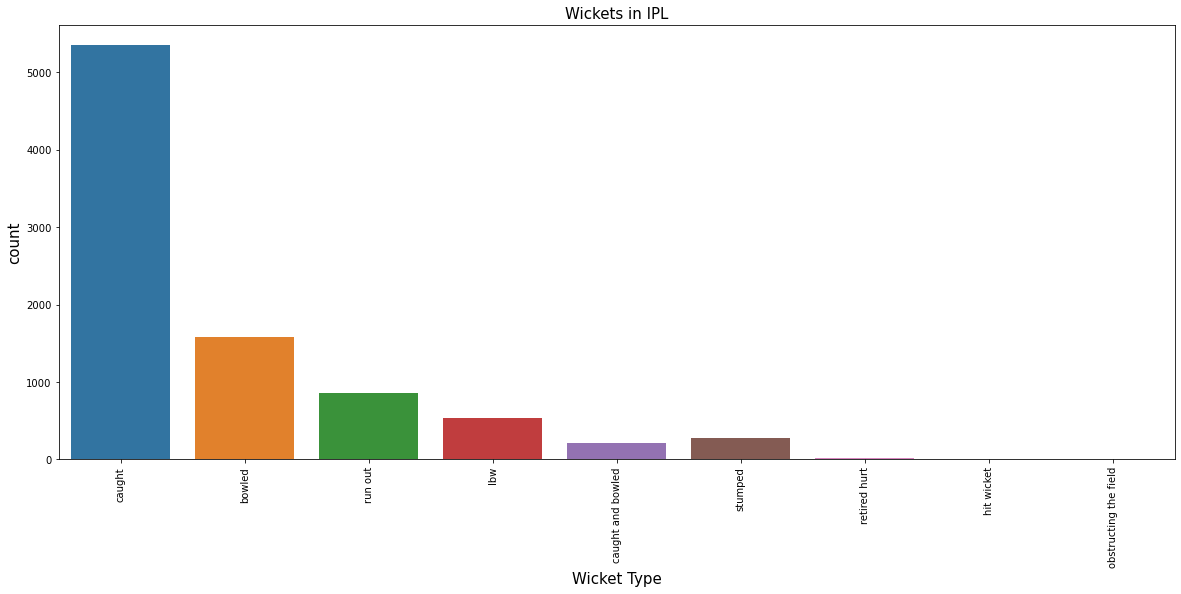

In [41]:
plt.figure(figsize=(20,8))
ax=sns.countplot(delivery.dismissal_kind)
plt.title("Wickets in IPL",fontsize=15)
plt.xlabel("Wicket Type",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [42]:
wicket_data=delivery.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',
        ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


In [43]:
wides = pd.DataFrame(merge.groupby('bowler')['wide_runs'].sum())
noballs = pd.DataFrame(merge.groupby('bowler')['noball_runs'].sum())
season = pd.DataFrame(merge.groupby('bowler')['season'].nunique())
extras_bowlers = pd.DataFrame({'wides':wides['wide_runs'],'no_balls':noballs['noball_runs']})
extras_bowlers.reset_index(inplace = True)

extras_bowlers['total_extras'] = extras_bowlers['wides'] + extras_bowlers['no_balls']
most_extras = extras_bowlers.sort_values(by='total_extras', ascending = False).head(15)

In [44]:
extras_bowlers.style.apply(lambda x: ['background: white' if x.name in [6] else '' for i in x], axis=1)

,bowler,wides,no_balls,total_extras
0,A Ashish Reddy,8,2,10
1,A Chandila,0,0,0
2,A Choudhary,6,1,7
3,A Dananjaya,1,0,1
4,A Flintoff,0,0,0
5,A Joseph,3,0,3
6,A Kumble,26,5,31
7,A Mishra,57,20,77
8,A Mithun,15,9,24
9,A Nehra,64,9,73


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

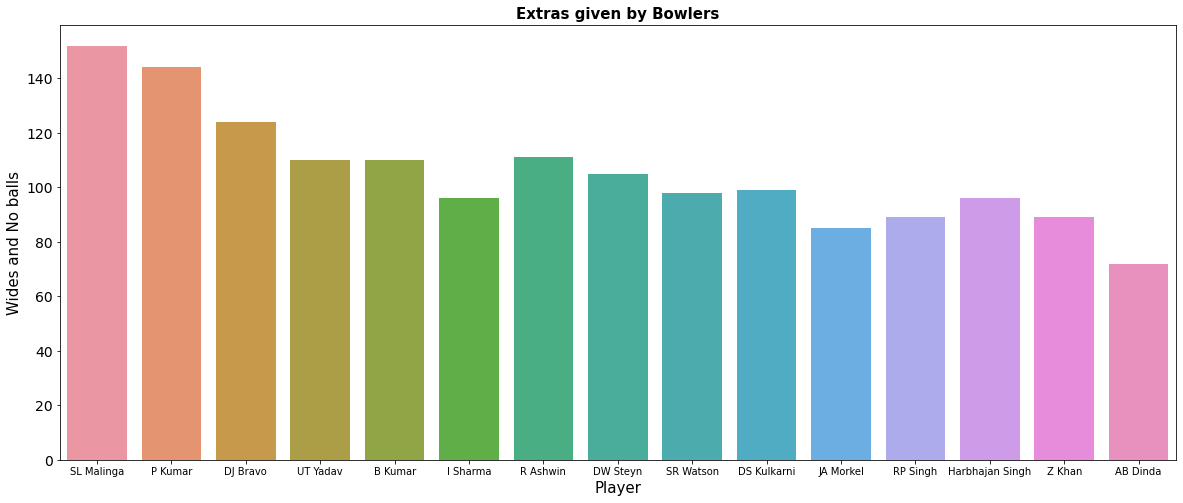

In [45]:
plt.figure(figsize = (20,8))
sns.barplot(x ='bowler', y='wides', data= most_extras)
sns.barplot(x ='bowler', y='no_balls', data= most_extras)
plt.title("Extras given by Bowlers",fontsize= 15, fontweight = 'bold')
plt.xlabel("Player", size = 15)
plt.ylabel("Wides and No balls", size = 15)
plt.xticks(size = 10)
plt.yticks(size = 14)

### Observation & Conclusions.

- Chandigarh and Mohali are same and there is just one stadium Punjab Cricket Association IS Bindra Stadium, Mohali whose value has not been entered correctly. We need to have either Chandigarh or Mohali as well as correct name of the stadium there

- Mumbai has 3 stadiums/venues used for IPL

- Pune has 2 venues for IPL

- So now team1, team2 and winner columns all have 13 distinct values

- City has 33 distinct values while we have 35 venues.

- Let's find out venues grouped by cities to see which cities have multiple venues

- 2011-2013 have more matches being played than other seasons

- All other seasons have approximately 58-60 matches while 2011-2013 have more than 70 matches.

- The highest number of match played in IPL season was 2013,2014,2015.

- The highest number of match won by Mumbai Indians i.e 4 match out of 12 matches.

- Teams which Bowl first has higher chances of winning then the team which bat first.

- After winning toss more teams decide to do fielding first.

- In finals teams which decide to do fielding first win the matches more then the team which bat first.

- In finals most teams after winning toss decide to do fielding first.

- Top player of match winning are CH gayle, AB de villers.

- It is interesting that out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL.

- Win toss and field first so as to win more matches irrespective of venues.

- If rain prediction is there, then also win toss and field first

- During auctions, if franchise is looking for a consistent batsman, they can go for Raina

- Go for Rusell, Gayle, AB, Watson if looking for the big hitters who can also score a lot of runs

- AB can be good catch as he has scored a lot of runs and maintained a very high strike rate of close to 150 over so many years.

- If franchise is looking for a consistent bowler who can get you wickets and also not give away too many runs then Malinga could be a good option. The only concern is that he gives away too many extras

- Tahir can be an equally good option as he has been the most impressive spinner in last few seasons woth a good strike rate and healthy average. However his economy rate has been on the higher side (8+)

- The highest number of four hit by player is Shikar Dhawan.

- The highest number of six hit by player is CH gayle.

- Top leading run scorer in IPL are Virat kholi, SK Raina, RG Sharma.

- The highest number of matches played by player name are SK Raina, RG Sharma.

- Dismissals in IPL was most by Catch out .

- The IPL most wicket taken blower is SL Malinga.

- Most teams decide to chase down totals after winning toss except for CSK which goes well with the fact that the have won most games (by good margin) by defending.

- 54% times teams who have chased irrespective of winning or losing toss have won matches. But teams winning tosses and electing to field first have won most number of times. It has been uniform across all venues. Particularly KKR, KIX Punjab, DD and RCB have won by big wicket margin.

- With rain affected matches also there seems to be slight advantage for teams batting second.

- MoM awards have mostly been received by batsmen implying t20 is a more batsmen-oriented game. Venues like Chinnaswamy,Wankhede, MCA, Mohali, Chepauk have been more batsman-friendly than others.

- Mostly the top run getters have been openers or 1st or 2nd down  batsmen except for MS Dhoni. That's becuase he has played a lot of matches.

- Suresh Raina has been most consistent batsmen among top run getters while AB has had the highest strike rate among all players who have played 10 or more seasons.

- Gayle has had the best average of 36.4 among all batsmen with more than 9 seasons under their belt. He has been sensational with most number of Man of the Match awards while in last 4 seasons David Warner has started amassing lot of runs with an average over 45.

- Rahane, Watson are not in top 10 run getters but have maintained a good average across the seasons.

- In last 4 seasons, Andre Russel has been phenomenal with 175+ strike rate.

- Malinga has been the most impressive bowler in IPL with more than 170 wickets at an average of 16.27, economy of 6.16 and strike rate of 15.84

- In last 5 years however, Bhubaneswar Kumar has stood out among pacers with 102 wickets under his name with an average of 18.82, strike rate of 18.42 and economy rate of 6.67

- Among spinners, Imran Tahir has performed quite well over last few seasons with an average of 20.62 and strike rate of 15.36

- Spinners generally do not give away many extra runs and all bowlers in top 10 of that list are pacers. 

- Amit Mishra is the only spinner in top 20 who has overstepped most number of times (21 no balls). He is second in the list of bowlers with most number of no balls after Ishant Sharma.

- Win toss and field first so as to win more matches irrespective of venues.

- If rain prediction is there, then also win toss and field first

- During auctions, if franchise is looking for a consistent batsman, they can go for Raina

- Go for Rusell, Gayle, AB, Watson if looking for the big hitters who can also score a lot of runs

- AB can be good catch as he has scored a lot of runs and maintained a very high strike rate of close to 150 over so many years.

- If franchise is looking for a consistent bowler who can get you wickets and also not give away too many runs then Malinga could be a good option. The only concern is that he gives away too many extras

- Tahir can be an equally good option as he has been the most impressive spinner in last few seasons woth a good strike rate and healthy average. However his economy rate has been on the higher side (8+)
